<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/networkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toky v grafu

## Zadání

Na obrázku níže jsou uvedeny propustnosti cest mezi uzlovými body. Vyřešte, které cesty a jak budou využity s cílem optimalizovat (najít maximum) přesun jednotek mezi vrcholy A a G.

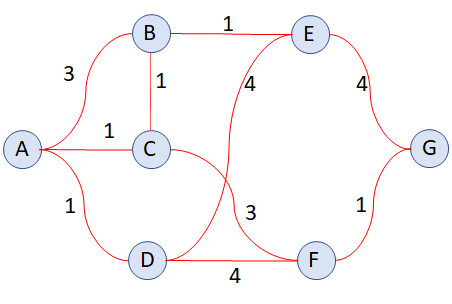

## Matematický model

$$f(x)=x_{AB}+x_{AC}+x_{AB} \to \max $$

$$g(x)=x_{EG}+x_{FG} \to \max $$

$$f(x_{opt})=g(x_{opt})$$

$$x_{AB} \le 3 $$

$$x_{AC} \le 1 $$

$$x_{AD} \le 1 $$

$$x_{BC} \le 3 \wedge x_{BC} \ge -3 $$

$$x_{BE} \le 1 \wedge x_{BE} \ge -1 $$

$$x_{CF} \le 3 \wedge x_{CF} \ge -3 $$

$$x_{DE} \le 4 \wedge x_{DE} \ge -4 $$

$$x_{DF} \le 4 \wedge x_{DF} \ge -4 $$

$$x_{FG} \le 1 $$

$$x_{EG} \le 4 $$




## Řešení pomocí knihovny Pulp

Pomocí knihovny pulp lze úlohu o maximálním toku řešit jako úlohu lineárního programování.

In [1]:
!pip install pulp

     |████████████████████████████████| 40.6MB 108kB/s 


In [3]:
from pulp import *

In [20]:
prob = LpProblem("myProblem", LpMaximize)
xab = LpVariable("xab", 0, 3)
xac = LpVariable("xac", 0, 1)
xad = LpVariable("xad", 0, 1)
xbc = LpVariable("xbc", -1, 1)
xbe = LpVariable("xbe", -1, 1)
xcf = LpVariable("xcf", -3, 3)
xde = LpVariable("xde", -4, 4)
xdf = LpVariable("xdf", -4, 4)
xeg = LpVariable("xeg", 0, 4)
xfg = LpVariable("xfg", 0, 1)


allvars = [xab, xac, xad, xbc, xbe, xcf, xde, xdf, xfg, xeg]

# fitness function
prob += (xab+xac+xad)

# vrchol B
prob += (xab-xbc-xbe==0)
# vrchol C
prob += (xac+xbc-xcf==0)
# vrchol D
prob += (xad-xde-xdf==0)
# vrchol E
prob += (xbe+xde-xeg==0)
# vrchol F
prob += (xcf+xdf-xfg==0)

status = prob.solve(solver)
print(LpStatus[status])
for var in allvars:
  print(var, value(var)) 
print('f:', value(xab)+value(xac)+value(xad))  

Optimal
xab 2.0
xac 1.0
xad 1.0
xbc 1.0
xbe 1.0
xcf 2.0
xde 3.0
xdf -2.0
xfg 0.0
xeg 4.0
f: 4.0


## Ford Fulkersonův algoritmus

Video k samostudiu:
https://www.youtube.com/watch?v=Tl90tNtKvxs

MIT videokurz:
https://www.youtube.com/watch?v=VYZGlgzr_As

### Krok 1

Nalezení cesty ze zdroje do cíle a určení minimální propustnosti na této cestě.

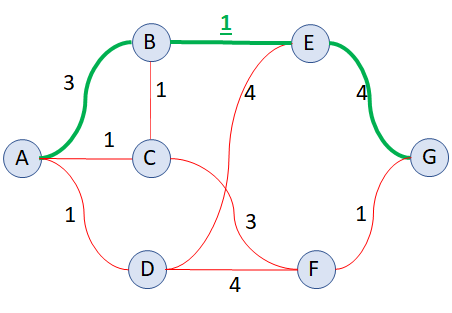

### Krok 2

Snížení propustnosti na všech hranách, které jsou součástí vybrané cesty. Aktuální tok je 1.

Nalezení nové cesty ze zdroje do cíle a stanovení minimální propustnosti.

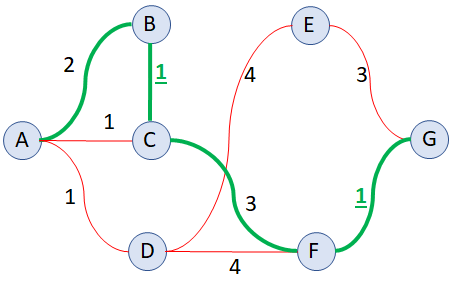

### Krok 3

Snížení propustnosti na všech hranách, které jsou součástí vybrané cesty. Aktuální tok je 2.

Nalezení nové cesty ze zdroje do cíle a stanovení minimální propustnosti.

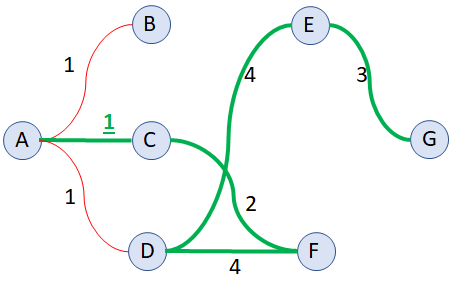

### Krok 4

Snížení propustnosti na všech hranách, které jsou součástí vybrané cesty. Aktuální tok je 3.

Nalezení nové cesty ze zdroje do cíle a stanovení minimální propustnosti.

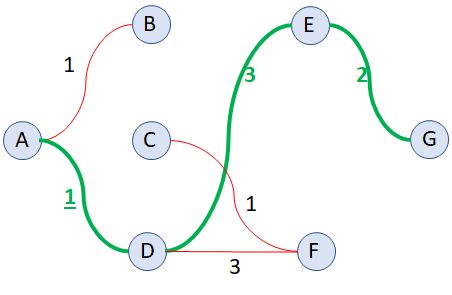

### Krok 5

Snížení propustnosti na všech hranách, které jsou součástí vybrané cesty. Aktuální tok je 4.

Cesta ze zdroje do cíle neexistuje, maximální tok v síti je 4.

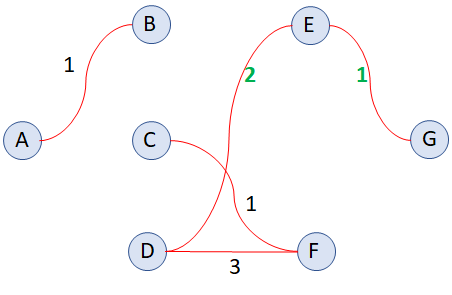

### Závěr

Maximálnímu toku odpovídá tzv. minimální řez. Snižením kapacity na minimálním řezu dojde k celkovému snížení propustnosti sítě.

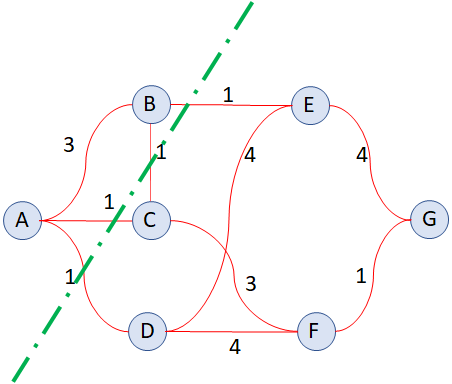